<a href="https://colab.research.google.com/github/RizkyaSalsabila/Assignment-Sem5_ML_Rizkya-Salsabila/blob/main/praktikum_05/TG5_2341720056_Rizkya_Salsabila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM 1

### Langkah 1 - Persiapan Lingkungan

In [2]:
# instalasi library hdbscan (karena tidak tersedia default pada sklearn)
!pip install hdbscan

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import hdbscan

### Langkah 2 - Definisi Fungsi Visualisasi

In [5]:
# fungsi untuk memplot hasil clustering
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
  # jika axis (ax) belum ada
  if ax is None:
    # buat subplot baru dengan ukuran 10, 4
    _, ax = plt.subplots(figsize=(10, 4))

  # jika label kosong, isi semua nilai dengan angka 1 (biar nggak error)
  labels = labels if labels is not None else np.ones(X.shape[0])

  # jika probabilitas kosong, isi semua nilai dengan angka 1
  probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])

  # ambil semua label set unik
  unique_labels = set(labels)

  # buat warna yang berbeda di setiap clusternya
  colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

  # map index titik ke probabilitasnya
  proba_map = {idx: probabilities[idx] for idx in range(len(labels))}

  # loop untuk tiap cluster
  for k, col in zip(unique_labels, colors):
    # jika label (k) bernilai -1, anggap noise (dengan memberikan warna hitam)
    if k == -1:
      # kode warna hitam
      col = [0, 0, 0, 1]

    # ambil index data yang masuk ke cluster k
    class_index = (labels == k).nonzero()[0]

    # loop tiap titik dalam cluster
    for ci in class_index:
      ax.plot(
          # koordinat X
          X[ci, 0],
          # koordinat Y
          X[ci, 1],
          # jika noise (karena bernilai -1), maka kasih tanda "x". Sedangkan, jika cluster kasih tanda "o"
          "x" if k == -1 else "o",
          # warna isi marker
          markerfacecolor=tuple(col),
          # warna pinggir hitam
          markeredgecolor="k",
          # jika noise kasih ukuran 4, jika cluster kasih ukuran sesuai probabilitas
          markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
      )

    # hitung jumlah cluster (kecuali noise)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # pemberian judul "True" untuk data asli, "Estimated" untuk hasil cluster
    preamble = "True" if ground_truth else "Estimated"

    # buat judul plot sesuai dengan banyaknya jumlah cluster
    title = f"{preamble} number of clusters: {n_clusters}"

    # kalau ada parameter kosong, beri judul juga
    if parameters is not None:
      parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
      title += f" | {parameters_str}"

    # set judul di plot
    ax.set_title(title)

    # agar layout rapi
    plt.tight_layout()

### Langkah 3 - Membuat Dataset Sintetis

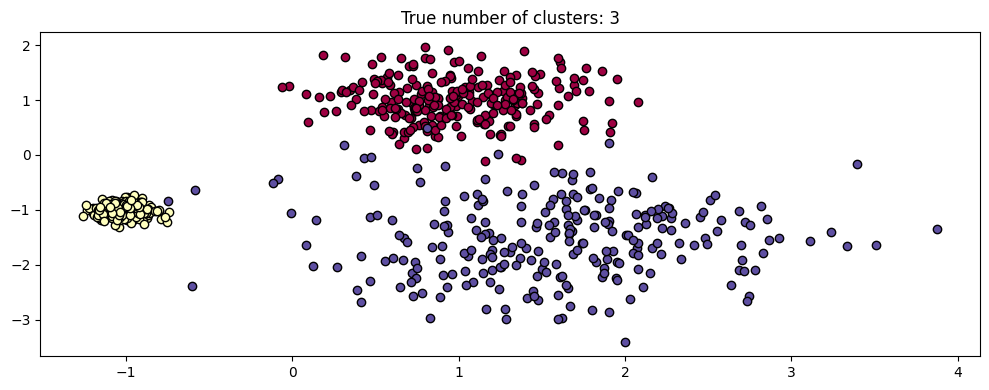

In [10]:
# membuat data sampel untuk clustering, dengan memberikan 3 titik pusat (centroid) untuk tiap cluster
centers = [[1, 1], [-1, -1], [1.5, -1.5]]
X, labels_true = make_blobs(
    # jumlah total sample data sebanyak 750
    n_samples=750,
    # pusat cluster di tengah
    centers=centers,
    # besar sebaran data (standar deviasi)
    cluster_std=[0.4, 0.1, 0.75],
    # seed selalu sama
    random_state=0
)

# menampilkan data hasil make_blobs dalam bentuk scatter plot
# dengan memberikan warna berbeda sesuai cluster asli
plot(X, labels=labels_true, ground_truth=True)